In [1]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import array as arr
import random
import datetime
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore")  # setting ignore as a parameter

In [2]:
# Colors

palette = {
    "Arid\nShrublands": "#cb7e0c",
    "Boreal\nForests": "#7570b3",
    "Mixed\nTemperate\nForests": "#9ACD32",
    "Short\nGrasslands": "#EEBC1D",
    "Temperate\nBroadleaved\nEvergreen Forests": "#004953",
    "Temperate\nConiferous\nForests": "#1b9d77",
    "Temperate\nDeciduous\nForests": "#008080",
    "Xeromorphic\nForests\n& Woodlands": "#666666",
}

In [3]:
fire = pd.read_csv(
    "../data/FIRE.csv",
    names=[
        "STATUS",
        "LON",
        "LAT",
        "COUNT",
        "ICOHORT",
        "POTVEG",
        "SUBTYPE",
        "MONTH",
        "YEAR",
        "VEGC",
        "RH",
        "VSM",
        "WILTP",
        "AWACAP",
        "THETA",
        "THETA_E",
    ],
)

# Normalize Data
fire.loc[fire["THETA"] > 1, "THETA"] = 1
fire.loc[fire["THETA"] < 0, "THETA"] = 0


fire = fire[["LON", "LAT", "POTVEG", "MONTH", "YEAR"]]

In [4]:
# Create a new column for fire counts
fire["POTVEG"] = fire["POTVEG"].replace(4, "Boreal Forests")
fire["POTVEG"] = fire["POTVEG"].replace(8, "Mixed Temperate Forests")
fire["POTVEG"] = fire["POTVEG"].replace(9, "Temperate Coniferous Forests")
fire["POTVEG"] = fire["POTVEG"].replace(10, "Temperate Decidous Forests")
fire["POTVEG"] = fire["POTVEG"].replace(13, "Short Grasslands")
fire["POTVEG"] = fire["POTVEG"].replace(15, "Arind Shrublands")
fire["POTVEG"] = fire["POTVEG"].replace(19, "Xeromophic Forests & Woodlands")
fire["POTVEG"] = fire["POTVEG"].replace(33, "Temperate Broadleaf Evergreen Forests")

fire.head()

,LON,LAT,POTVEG,MONTH,YEAR
0,-124.5,42.5,Temperate Coniferous Forests,10,2018
1,-124.0,40.0,Mixed Temperate Forests,8,2015
2,-124.0,40.0,Mixed Temperate Forests,7,2015
3,-124.0,40.5,Temperate Coniferous Forests,9,2015
4,-124.0,41.0,Temperate Coniferous Forests,9,2015


In [5]:
grids_burned = pd.DataFrame()
grids_burned = fire.groupby(["LON", "LAT"])["YEAR"].count().reset_index()

grids_burned.rename(columns={"YEAR": "COUNT"}, inplace=True)


grids_burned = grids_burned.merge(fire, on=["LON", "LAT"], how="left")

grids_burned.head()

,LON,LAT,COUNT,POTVEG,MONTH,YEAR
0,-124.5,42.5,1,Temperate Coniferous Forests,10,2018
1,-124.0,40.0,2,Mixed Temperate Forests,8,2015
2,-124.0,40.0,2,Mixed Temperate Forests,7,2015
3,-124.0,40.5,1,Temperate Coniferous Forests,9,2015
4,-124.0,41.0,1,Temperate Coniferous Forests,9,2015


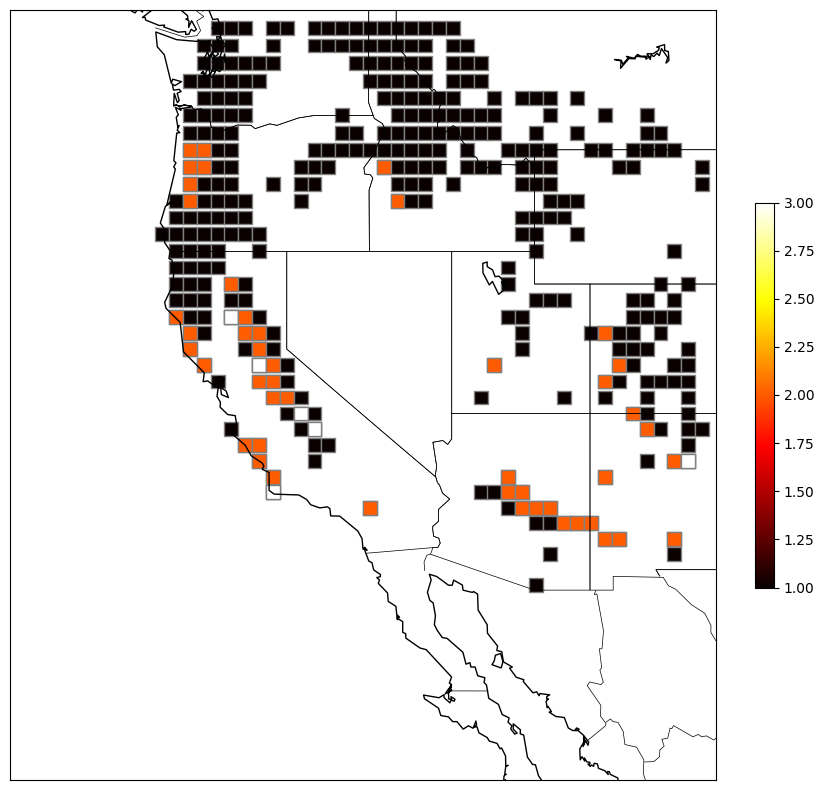

In [6]:
plt.figure(figsize=(25, 10))
m = Basemap(
    projection="mill",
    llcrnrlat=25,
    llcrnrlon=-130,
    urcrnrlat=49,
    urcrnrlon=-104.5,
    resolution="l",
)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
x, y = m(list(grids_burned["LON"]), list(grids_burned["LAT"]))
m.scatter(
    x, y, c=grids_burned["COUNT"], s=100, cmap="hot", edgecolor="gray", marker="s"
)
c = plt.colorbar(orientation="vertical", shrink=0.5, pad=0.02)

In [7]:
fires = pd.DataFrame()
fires["BURN"] = fire.groupby(["YEAR"])["YEAR"].count()

fires = fires.reset_index()
mean = fires.mean()
print(mean)
fires.to_csv("../data/fires.csv", index=False, header=False)
fires.head()

YEAR    2049.959184
BURN       8.204082
dtype: float64


,YEAR,BURN
0,2015,194
1,2016,49
2,2017,9
3,2018,2
4,2019,10


Text(0, 0.5, 'Annual Total Number of Fires')

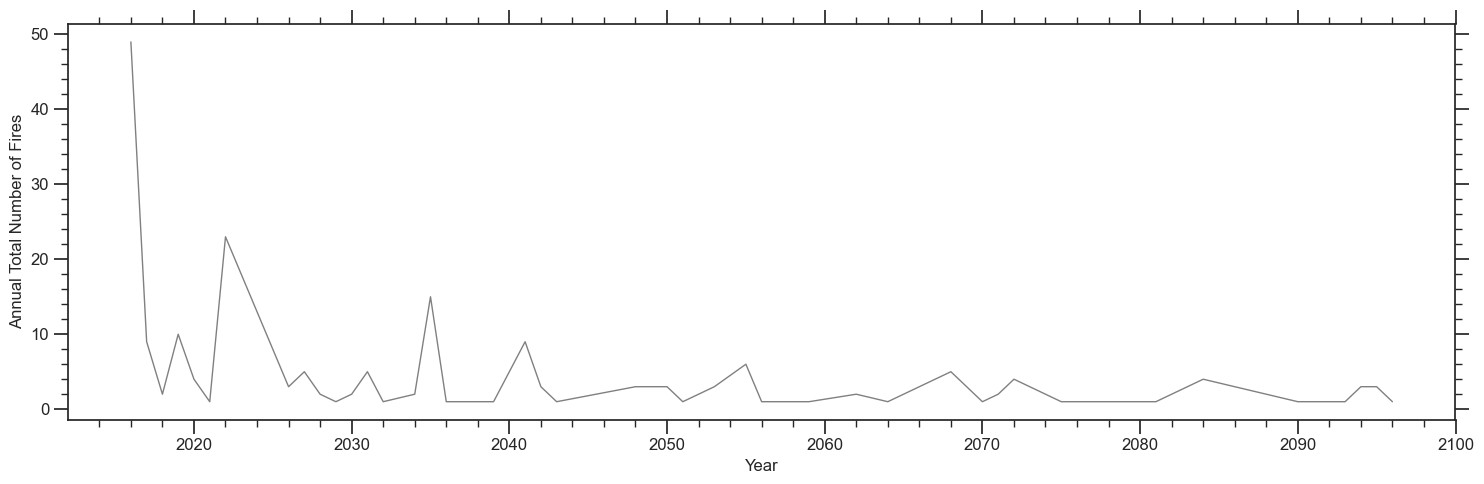

In [8]:
fires_mod = fires.query("YEAR >= 2016")
sns.set(rc={"figure.figsize": (15, 5)})
sns.set(rc={"lines.linewidth": 1})
plt.rcParams["figure.autolayout"] = True
# sns.set_context("poster")
sns.set_style(style="white")
sns.set_style("ticks")

b2 = sns.lineplot(x="YEAR", y="BURN", data=fires_mod, color="grey")

b2.xaxis.set_major_locator(MultipleLocator(10))

# plot params
plt.minorticks_on()
plt.tick_params(labelsize=12)
plt.tick_params(
    direction="out",
    which="minor",
    length=5,
    bottom=True,
    top=True,
    left=True,
    right=True,
)
plt.tick_params(
    direction="out",
    which="major",
    length=10,
    bottom=True,
    top=True,
    left=True,
    right=True,
)
plt.xlabel("Year")
plt.ylabel("Annual Total Number of Fires")
# plt.savefig("../figures/fire/fire.png", dpi=1200, bbox_inches="tight")